# Como saber se um cogumelo é comestível?
## Feito por: 
**André Costa e Guilherme Aranha**

## Introdução
É senso comum que cogumelos podem ser uma boa fonte de proteina para alimentação, mas sempre quando encotramos um, nunca sabemos se é possivel come-lo ou se ele pode apresentar riscos a sua saúde tendo algum tipo de veneno. Assim, decidimos encontrar alguma base de dados com vairos cogumelos catalogados com suas características físicas,incluindo se ele possui veneno.

In [40]:
#todas as bibliotecas que vamos utilizar nesse notebook
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, ensemble, naive_bayes, model_selection

*A base de dados que vamos utilizar foi encontrada no site Kraggle, sendo um arquivo csv com vários cogumelos catalogados com 23 variáveis.
link:https://www.kaggle.com/uciml/mushroom-classification*

In [41]:
#importand a planilha 
data = pd.read_csv("mushrooms.csv") 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Como podemos observar, a planilha esta escrita em ingles, e os elementos dela estão apresentados apenas com uma letra.
Assim, para poder facilitar a manipulação dos dados, decidimos mudar ela para portugues e escrever por inteiro seus elementos.

In [42]:
data_clean = data

#alterando os titulos para portugues
colunas = {
    'class': 'tipo',
    'cap-shape': 'formato-do-chapeu',
    'cap-surface': 'superficie-do-chapeu',
    'cap-color': 'cor-do-chapeu',
    'bruises': 'marcas',
    'odor': 'cheiro',
    'gill-attachment': 'anexos-do-himenio',
    'gill-spacing': 'espacamento-do-himenio',
    'gill-size': 'tamanho-do-himenio',
    'gill-color': 'cor-do-himenio',
    'stalk-shape': 'formato-do-estipe',
    'stalk-root': 'raiz-do-estipe',
    'stalk-surface-above-ring': 'superficie-do-estipe-acima-do-anel',
    'stalk-surface-below-ring': 'superficie-do-estipe-abaixo-do-anel',
    'stalk-color-above-ring': 'cor-do-estipe-acima-do-anel',
    'stalk-color-below-ring': 'cor-do-estipe-abaixo-do-anel',
    'veil-type': 'tipo-do-veu',
    'veil-color': 'cor-do-veu',
    'ring-number': 'numero-de-aneis',
    'ring-type': 'tipo-do-anel',
    'spore-print-color': 'cor-da-esporada',
    'population': 'populacao',
    'habitat': 'habitat',
    }

data_clean = data_clean.rename(columns=colunas)

del data_clean['tipo-do-veu'] # <--- só tem um único valor para essa variável.

data_clean.head()

,tipo,formato-do-chapeu,superficie-do-chapeu,cor-do-chapeu,marcas,cheiro,anexos-do-himenio,espacamento-do-himenio,tamanho-do-himenio,cor-do-himenio,...,superficie-do-estipe-acima-do-anel,superficie-do-estipe-abaixo-do-anel,cor-do-estipe-acima-do-anel,cor-do-estipe-abaixo-do-anel,cor-do-veu,numero-de-aneis,tipo-do-anel,cor-da-esporada,populacao,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [43]:
#alterando os valores para portugues
valores = {
    'tipo': {'p': 'venenoso','e': 'comestivel',},
    'formato-do-chapeu': {'x': 'convexo','b': 'sino','s': 'afundado','f': 'plano','k': 'nodoso','c': 'conico',},
    'superficie-do-chapeu': {'s': 'lisa','y': 'escamoso','f': 'fibroso','g': 'ranhuras',},
    'cor-do-chapeu': {'n': 'marrom','y': 'amarelo','w': 'branco','g': 'cinza','e': 'vermelho','p': 'rosa','b': 'couro','u': 'roxo','c': 'canela','r': 'verde',},
    'marcas': {'t': 'sim','f': 'nao',},
    'cheiro': {'p': 'pungente','a': 'almondega','l': 'anis','n': 'nenhum','f': 'fedorento','c': 'queimado','y': 'peixe','s': 'apimentado','m': 'mofo',},
    'anexos-do-himenio': {'f': 'sem','a': 'com',},
    'espacamento-do-himenio': {'c': 'medio','w': 'perto',},
    'tamanho-do-himenio': {'n': 'pequeno','b': 'grande',},
    'cor-do-himenio': {'k': 'preto','n': 'marrom','g': 'cinza','p': 'rosa','w': 'branco','h': 'chocolate','u': 'roxo','e': 'vermelho','b': 'couro','r': 'verde','y': 'amarelo','o': 'laranja',},
    'formato-do-estipe': {'e': 'alargando','t': 'afunilando',},
    'raiz-do-estipe': {'e': 'igual','c': 'bastao','b': 'bulbo','r': 'enraizado','?': 'faltando',},
    'superficie-do-estipe-acima-do-anel': {'s': 'lisa','f': 'fibrosa','k': 'sedosa','y': 'escamosa',},
    'superficie-do-estipe-abaixo-do-anel': {'s': 'lisa','f': 'fibrosa','y': 'escamosa','k': 'sedosa',},
    'cor-do-estipe-acima-do-anel': {'w': 'branco','g': 'cinza','p': 'rosa','n': 'marrom','b': 'couro','e': 'vermelho','o': 'laranja','c': 'canela','y': 'amarelo',},
    'cor-do-estipe-abaixo-do-anel': {'w': 'branco','p': 'rosa','g': 'cinza','b': 'couro','n': 'marrom','e': 'vermelho','y': 'amarelo','o': 'laranja','c': 'canela',},
    'cor-do-veu': {'w': 'branco','n': 'marrom','o': 'laranja','y': 'amarelo',},
    'numero-de-aneis': {'o': '1','t': '2','n': '0',},
    'tipo-do-anel': {'p': 'pingente','e': 'evanescente','l': 'largo','f': 'resplandecente','n': 'nenhum',},
    'cor-da-esporada': {'k': 'preto','n': 'marrom','u': 'roxo','h': 'chocolate','w': 'branco','r': 'verde','o': 'laranja','y': 'amarelo','b': 'couro',},
    'populacao': {'s': 'espalhado','n': 'numeroso','a': 'abundante','v': 'varios','y': 'solitario','c': 'agrupados',},
    'habitat': {'u': 'urbano','g': 'grama','m': 'prado','d': 'floresta','p': 'caminhos','w': 'lixo','l': 'folhas',}
}

data_clean = data_clean.replace(valores)
data_clean.head()

,tipo,formato-do-chapeu,superficie-do-chapeu,cor-do-chapeu,marcas,cheiro,anexos-do-himenio,espacamento-do-himenio,tamanho-do-himenio,cor-do-himenio,...,superficie-do-estipe-acima-do-anel,superficie-do-estipe-abaixo-do-anel,cor-do-estipe-acima-do-anel,cor-do-estipe-abaixo-do-anel,cor-do-veu,numero-de-aneis,tipo-do-anel,cor-da-esporada,populacao,habitat
0,venenoso,convexo,lisa,marrom,sim,pungente,sem,medio,pequeno,preto,...,lisa,lisa,branco,branco,branco,1,pingente,preto,espalhado,urbano
1,comestivel,convexo,lisa,amarelo,sim,almondega,sem,medio,grande,preto,...,lisa,lisa,branco,branco,branco,1,pingente,marrom,numeroso,grama
2,comestivel,sino,lisa,branco,sim,anis,sem,medio,grande,marrom,...,lisa,lisa,branco,branco,branco,1,pingente,marrom,numeroso,prado
3,venenoso,convexo,escamoso,branco,sim,pungente,sem,medio,pequeno,marrom,...,lisa,lisa,branco,branco,branco,1,pingente,preto,espalhado,urbano
4,comestivel,convexo,lisa,cinza,nao,nenhum,sem,perto,grande,preto,...,lisa,lisa,branco,branco,branco,1,evanescente,marrom,abundante,grama


## Análise Exploratória
Agora que a planilha já esta organizada e em portugues, vamos checar se existe algum cogumelo com as mesmas caracteristicas (mesmo que mudando o tipo).

In [44]:
'Todos os cogumelos da lista: {} // Cogumelos sem repetição: {}'.format(len(data_clean.index),len(data_clean.drop(columns='tipo').drop_duplicates().index))

'Todos os cogumelos da lista: 8124 // Cogumelos sem repetição: 8124'

Bom com isso sabemos que não existe nenhum cogumelo com as mesmas características na lista, portanto, todos eles sao únicos.
Assim, seria possivel fazer uma boa previsão se ele seria comestivel ou venenoso ja que não existe cogumelos com características iguais e resultados diferentes (comestivel ou venenoso).
Agora vamos observar as porcentagem de cada caracteristica no nosso dataset:

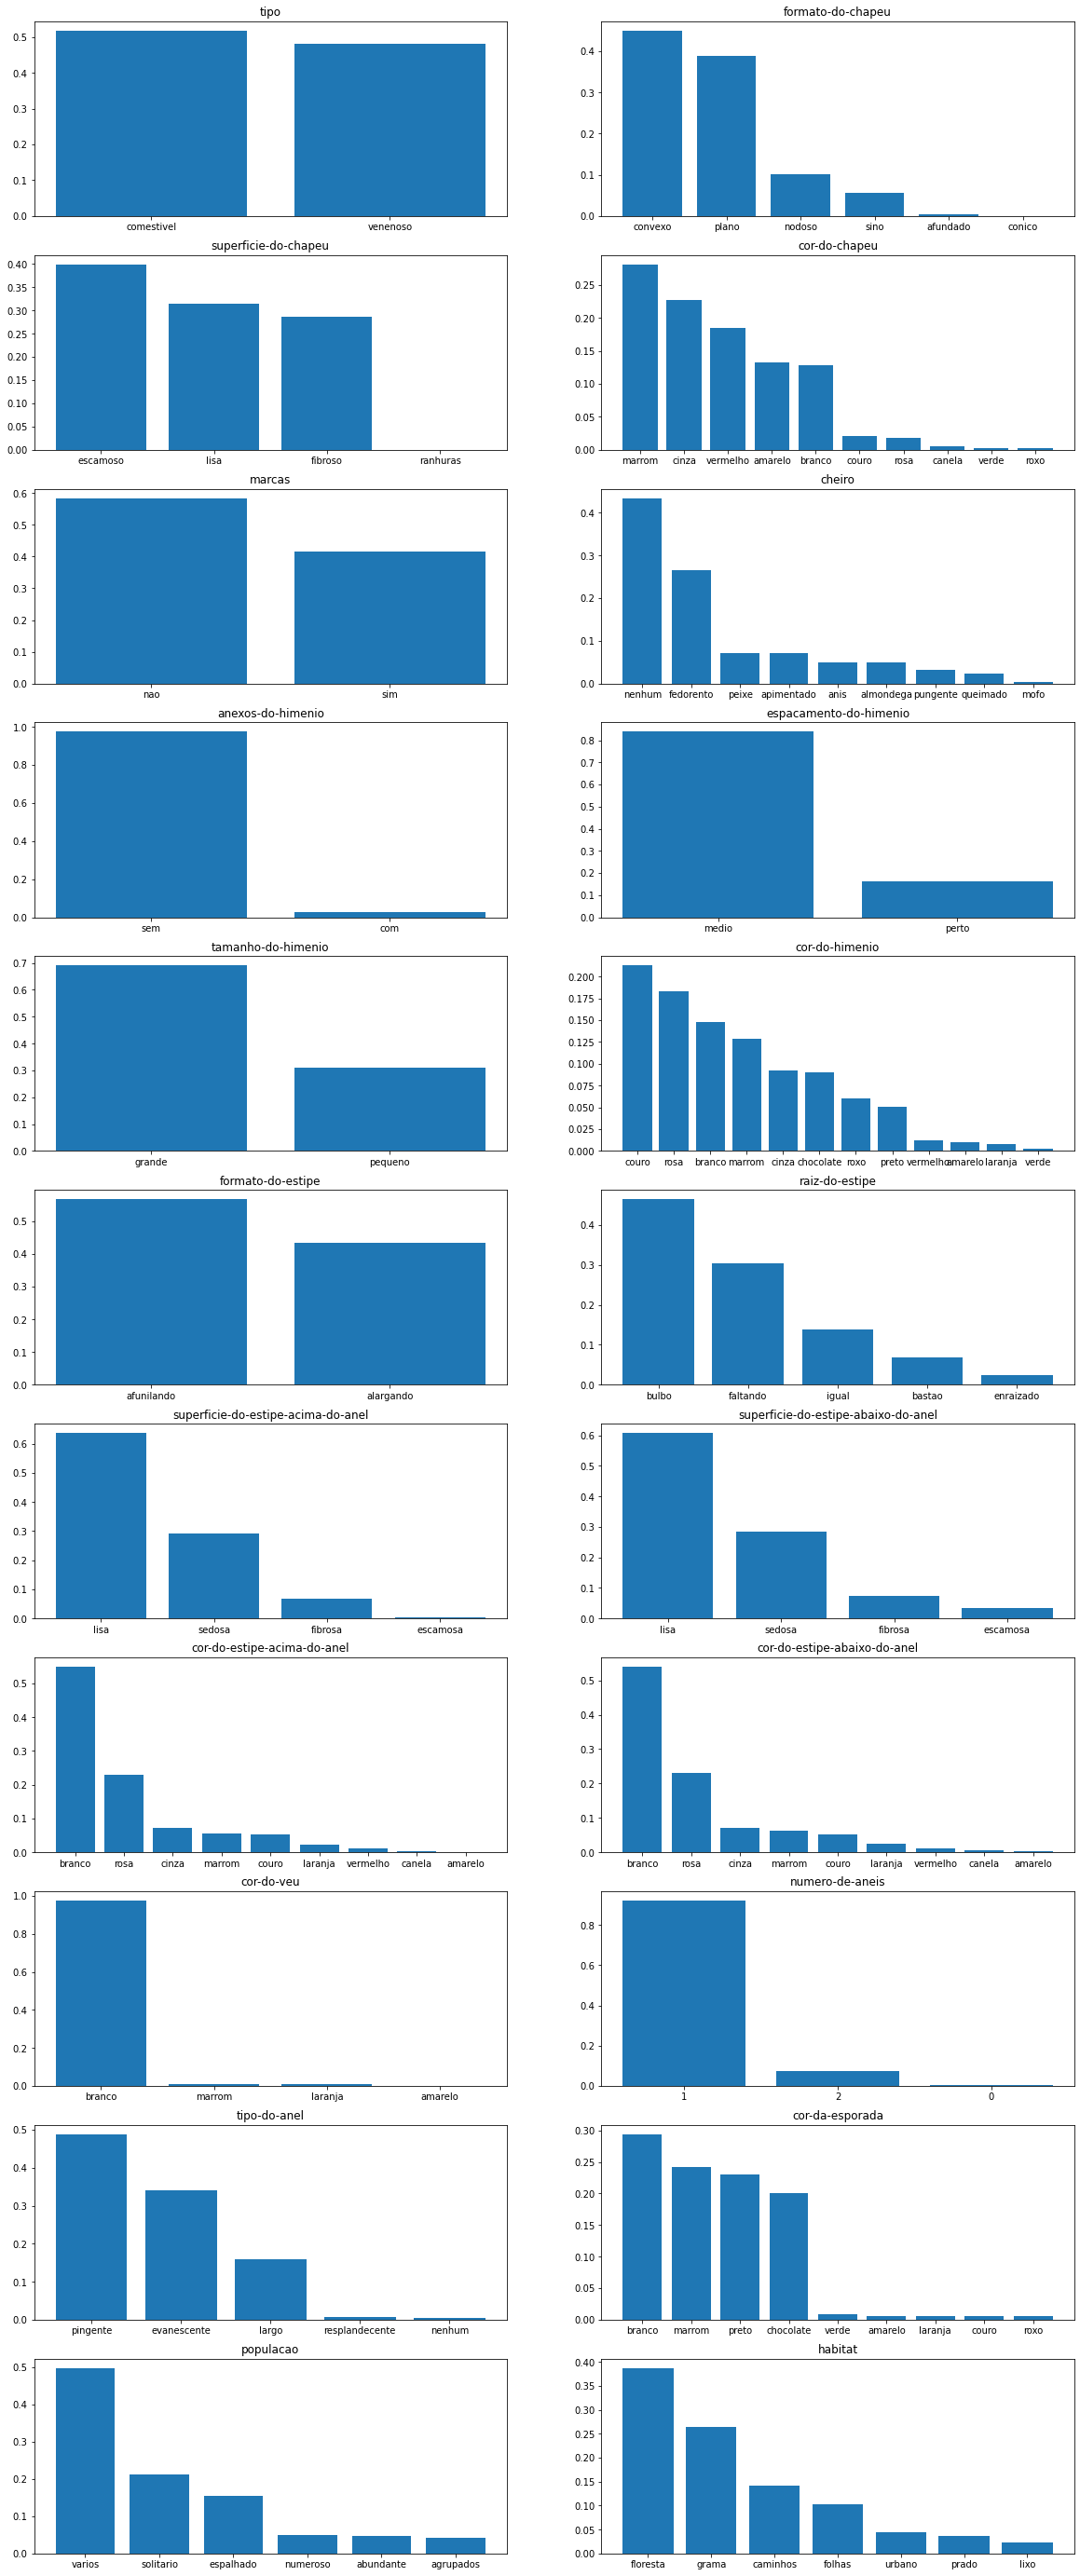

In [45]:
i = 0 #posição do subplot
f = plt.figure(figsize=(20, 50)) #tamanho do subplot
for coluna in data_clean:
    i += 1
    plot = f.add_subplot(11, 2, i)
    plot.bar(data_clean[coluna].value_counts().index,data_clean[coluna].value_counts(normalize=True))
    plt.title(coluna)
plt.show()


Com isso reparamos que a distribuição entre cogumelos venenosos e comestiveis é muito próxima, o que vai nos ajudar nas próximas etapas do trabalho por estar bem equilibrado. Também reparamos que dentro de uma variável, existem algumas características que dominam, como por exemplo a grande maioria dos cogumelos possuem anexos do himênio.
Vamos observar a distribuição entre cogumelos venenosos e comestiveis mais claramente:

In [46]:
data_clean['tipo'].value_counts(normalize=True)

comestivel    0.517971
venenoso      0.482029
Name: tipo, dtype: float64

Assim, sabemos que nosso modelo deve ter uma taxa de acerto maior que 52% já que, caso seja menor, ele se mostra um método de seleção pior do que simplesmente apontar todos os cogumelos como comestíveis.

Vamos invetigar agora a porcentagem de cogumelos venenosos e comestiveis por característica:

(A densidade nesses gráficos é em relação aos outros valores da mesma variável no mesmo tipo (as barras azuis somam 1 e as laranjas somam 1, logo, os graficos possuem um total na densidade de 2, sendo a densidade de venenosos e comestíveis independente))

/Users/sphinx/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


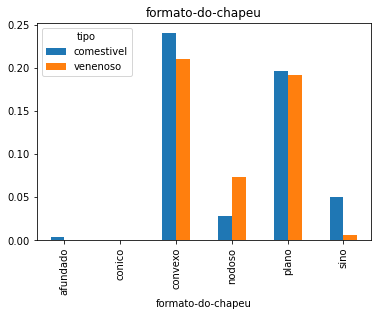

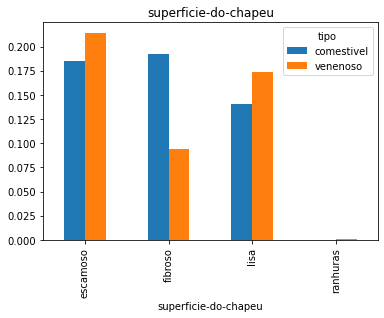

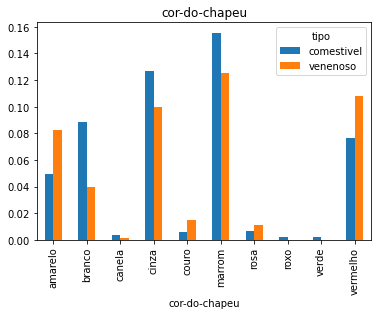

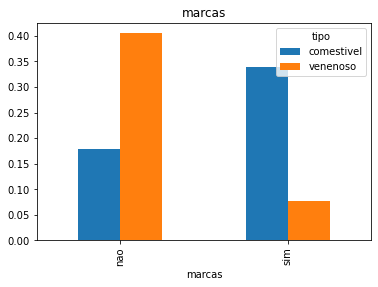

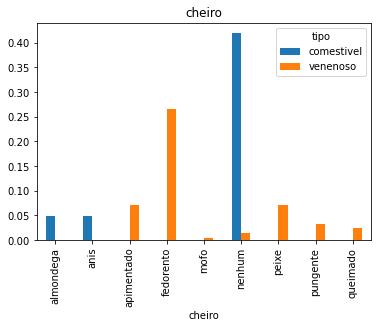

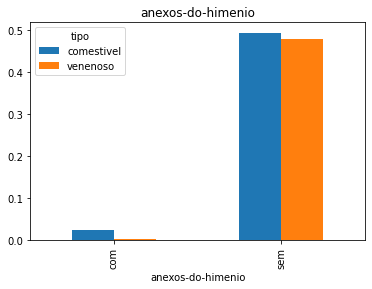

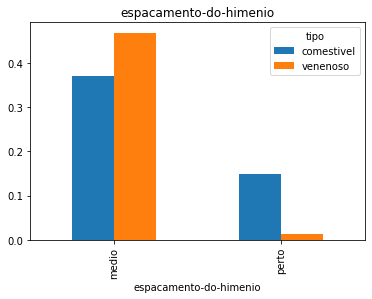

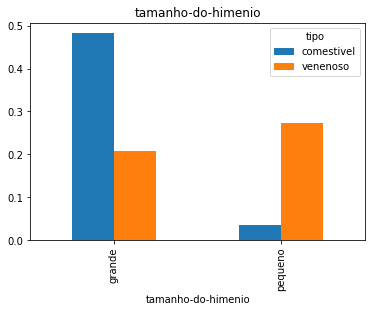

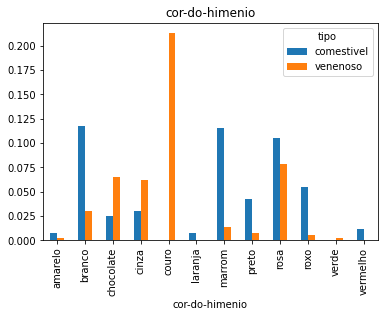

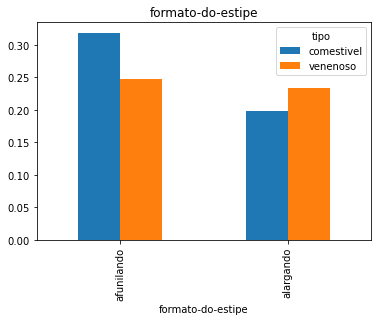

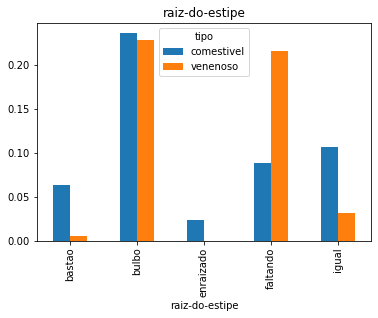

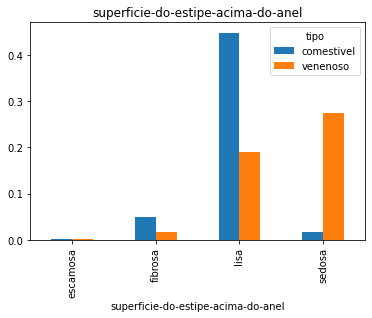

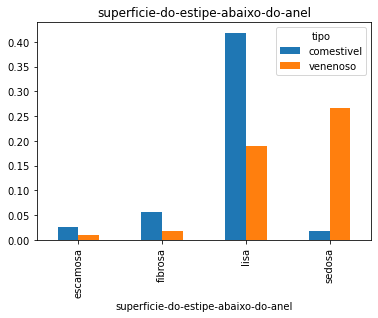

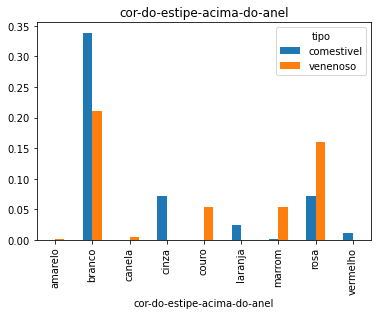

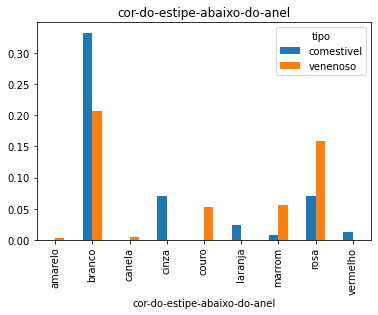

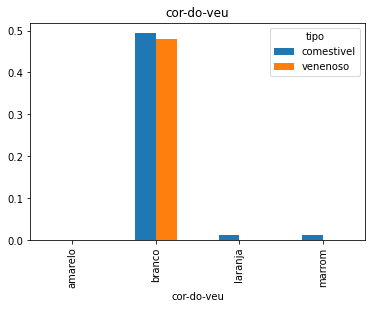

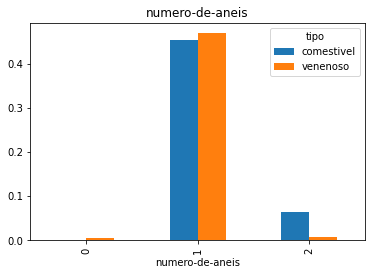

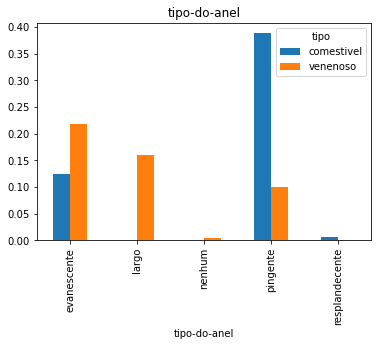

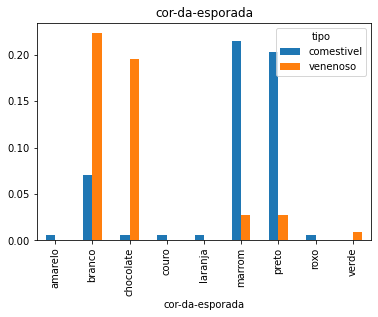

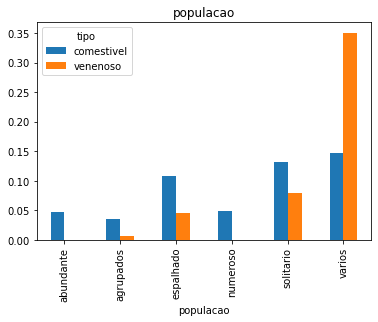

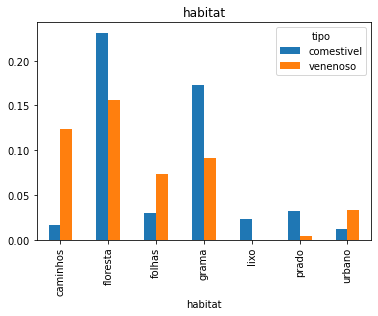

In [47]:
for coluna in data_clean.drop(columns=['tipo']):
    pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo'], normalize='all').plot.bar()
    #print(pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo'], normalize='columns'))
    plt.title(coluna)
plt.show()

Concluimos a partir desses gráficos que existem várias características diretamente relacionadas ao tipo de cogumelo. Chama expecial atenção o cheiro: se o cogumelo tiver algum cheiro (aprox. 60% das amostras), é possivel identificar se ele é venenoso ou comestível a partir apenas dessa característica.

## Criação dos Modelos
Escolhemos três modelos: uma regressão logística, uma Random Forest e um Naive Bayes como nossos modelos.

Optamos pelo Random Forest por ser um algoritmo relativamente simples de configurar, porem que apresenta valores interessantes.
Esse nome surge pelo fato que o algorimo é um conjunto de arvores de decisão, com cada uma relativamente diferente da outra.
As árvores de decisão criam um fluxograma com condições dos valores das variáveis indepentes, assim elasseguem um ramo ate chegar em um resultado esperado (que no nosso caso seria comestivel = 1 e venenoso = 0). Como cada árvore é diferente uma da outra, o valor retornado da maioria das arvores é o escolhido pelo modelo. 

A Regressão Logística seria a construção de uma função logística que separaria os valores do gráfico entre a variável dependente e indepentente para prever o resultado do modelo (no nosso caso comestível ou venenoso) pela posição do ponto no gráfico. Assim ela é como uma regressão linear, mudando apenas o formato da função.

O Naice Bayes calcula para cada característica a porcentagem de cogumelos comestíveis e venenosos nos nossos dados, assim, ele pesa cada característica do cogumelo a ser avaliado tanto comparando com os cogumelos comestíveis quanto aos venenosos e escolhe o que ele se aproxima mais.

Para preparar nossos dados para esses modelos, precisavamos transformar todas nossas variáveis qualitativas em quantitativas. Fizemos essa transformação do nosso DataFrame usando a função get_dummies do pandas, que separa cada possível valor de uma variável categórica em uma nova variável qualitativa.

In [48]:
data_clean_dummies = pd.get_dummies(data_clean)

In [49]:
data_clean_dummies.head()

,tipo_comestivel,tipo_venenoso,formato-do-chapeu_afundado,formato-do-chapeu_conico,formato-do-chapeu_convexo,formato-do-chapeu_nodoso,formato-do-chapeu_plano,formato-do-chapeu_sino,superficie-do-chapeu_escamoso,superficie-do-chapeu_fibroso,...,populacao_numeroso,populacao_solitario,populacao_varios,habitat_caminhos,habitat_floresta,habitat_folhas,habitat_grama,habitat_lixo,habitat_prado,habitat_urbano
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Como nossas variaveis já estão no formato quantitavo para poder implementar nossos modelos, separamos nossos dados em dois datasets com o intuito de usar um deles para treinar e outro para verificar a proeficiência do nosso modelo. Escolhemos o corte 0.6:0.4 por padrão.

In [50]:
razao = 0.6 #razao é o tamanho do treino, (1 - razao) é o tamanho do teste
corte = int(razao*data_clean_dummies.shape[0])
data_treino = data_clean_dummies.iloc[:corte,:]
data_teste = data_clean_dummies.iloc[corte:,:]

In [51]:
X_treino = data_treino.drop(columns=["tipo_comestivel", "tipo_venenoso"])
y_treino = data_treino['tipo_comestivel']
X_teste = data_teste.drop(columns=["tipo_comestivel", "tipo_venenoso"])
y_teste = data_teste['tipo_comestivel']

O Random Forest possui diversas constantes ajustáveis que permitem a construção de um modelo mais preciso. Para deixar o projeto simples, decidimos apenas modificar a quantidade de árvores geradas pelo modelo. 
Para isso vamos utilizar a validação cruzada, que testa o modelo com os diferentes números de arvores encontradas no dicionário dos parametros para encontrar a melhor opção atravez da força bruta.

In [52]:
parametros = {
    'n_estimators': [10,30,50,70,100,120,150,200]
}

random_forest_cv = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid=parametros, cv=5)
random_forest = random_forest_cv.fit(X_treino,y_treino)
random_forest.best_estimator_

RandomForestClassifier(n_estimators=50)

Usamos um cv do GridSearchCV (quantas vezes ele testa cada classificador) alto no intuito de diminuir a variância do resultado (ja que o Random Forest é um modelo randômico). E com isso percebemos que, em geral, nosso modelo alcança os melhores resultados com 120 arvores (testamos algumas vezes e, na maioria delas, saiu 120).
(deixamos o cv em 5 para que não demorasse tanto cada vez que reloadassemos o projeto, mas usamos 50 na decisão)

A partir disso, montamos os 3 algoritimos para analizar seus resultados a seguir.

In [53]:
metodos = [ensemble.RandomForestClassifier(n_estimators=120), linear_model.LogisticRegression(), naive_bayes.GaussianNB()]

for i in metodos:

    model = i
    model.fit(X_treino, y_treino)

    ypred = model.predict(X_teste)

    resultado = pd.crosstab(ypred, y_teste, rownames=['predição:'], colnames=['é comestivel:'])
    acertos = resultado[0][0] + resultado[1][1]
    erros = resultado[0][1] + resultado[1][0]
    porcentagem = acertos/(acertos + erros)*100
    
    print('>>> ' + repr(i) + ':\n')
    print(f"acertos: {acertos} // erros: {erros} // %: {porcentagem}")
    display(resultado)

>>> RandomForestClassifier(n_estimators=120):

acertos: 3164 // erros: 86 // %: 97.35384615384616


é comestivel:,0,1
predição:,,
0,2424,43
1,43,740


>>> LogisticRegression():

acertos: 3132 // erros: 118 // %: 96.36923076923077


é comestivel:,0,1
predição:,,
0,2447,98
1,20,685


>>> GaussianNB():

acertos: 2913 // erros: 337 // %: 89.63076923076923


é comestivel:,0,1
predição:,,
0,2416,286
1,51,497


Pelos resultados, todos os nossos modelos superaram seu benchmark (a porcentagem de cogumelos comestiveis na base de dados, 51.8%)

Todos os erros dos modelos tiveram peso maior nos falsos negativos, o que no nosso caso é bom, pois mais vale a classificação de um cogumelo como venenoso sendo ele comestível do que ao contrário, levando em conta o contexto: melhor passar fome do que morrer, espero...

Mesmo sendo o Random Forest nosso melhor classificador, por possuir etapas randômicas e, por isso, variar em acurácia, não conseguimos definir precisamente sua porcentagem de acertos.

Em segundo lugar temos a Regressao logistia com aproximadamente 96% de acurácia. Apesar de não ser o melhor, trouxe resultados bem próximos ào Random Forest e sua vantagem é que podemos prever como o algoritmo irá classificar, uma vez que não possui etapas randômicas.

Em terceiro lugar foi o Naive Bayes, com aproximadamente 89% de acurácia. Isso era esperado pois, para o Naive Bayes chegar em resultados interessantes, é preciso ter uma base de dados de treinamento bastante ampla, o que não é o nosso caso. 

Assim, levando em conta o contexto, o problema dos nossos modelos é que todos eles tentam classificar todos os cogumelos como comestíveis ou venenosos, mesmo que o resultado nao seja muito preciso. Isso, no nosso caso, não é muito vantajoso, pois queremos garantir que um cogumelo é comestivel antes de ingeri-lo (sem risco de morte por falso positivo).
Além disso, nossos modelos precisam de um computador ou matemática relativamente avançada para a classificação de um cogumelo, coisa que pode ser de dificil acesso em algumas situações.
Levando tudo isso em conta, apresentamos nosso último modelo: uma árvore de decisão baseada apenas na análise exploratória para que obtivessemos a maior certeza possível de que um cogumelo é comestivel, baseado nos nossos dados disponíveis.
Como nossa base de dados não garante amostras de absolutamente todos os cogumelos existentes na Terra, ainda estamos sujeitos a teoria do cisne negro. Logo, nosso modelo não busca ser perfeito, apenas o melhor que a nossa base de dados oferece para garantir cogumelos comestiveis.

Para isso, vamos separar novamente a quantidade de cogumelos de cada característica, para saber quantos são venenosos e quantos são comestíveis.

In [54]:
for coluna in data_clean.drop(columns=['tipo']):
    display(pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']))


tipo,comestivel,venenoso
formato-do-chapeu,,
afundado,32,0
conico,0,4
convexo,1948,1708
nodoso,228,600
plano,1596,1556
sino,404,48


tipo,comestivel,venenoso
superficie-do-chapeu,,
escamoso,1504,1740
fibroso,1560,760
lisa,1144,1412
ranhuras,0,4


tipo,comestivel,venenoso
cor-do-chapeu,,
amarelo,400,672
branco,720,320
canela,32,12
cinza,1032,808
couro,48,120
marrom,1264,1020
rosa,56,88
roxo,16,0
verde,16,0


tipo,comestivel,venenoso
marcas,,
nao,1456,3292
sim,2752,624


tipo,comestivel,venenoso
cheiro,,
almondega,400,0
anis,400,0
apimentado,0,576
fedorento,0,2160
mofo,0,36
nenhum,3408,120
peixe,0,576
pungente,0,256
queimado,0,192


tipo,comestivel,venenoso
anexos-do-himenio,,
com,192,18
sem,4016,3898


tipo,comestivel,venenoso
espacamento-do-himenio,,
medio,3008,3804
perto,1200,112


tipo,comestivel,venenoso
tamanho-do-himenio,,
grande,3920,1692
pequeno,288,2224


tipo,comestivel,venenoso
cor-do-himenio,,
amarelo,64,22
branco,956,246
chocolate,204,528
cinza,248,504
couro,0,1728
laranja,64,0
marrom,936,112
preto,344,64
rosa,852,640


tipo,comestivel,venenoso
formato-do-estipe,,
afunilando,2592,2016
alargando,1616,1900


tipo,comestivel,venenoso
raiz-do-estipe,,
bastao,512,44
bulbo,1920,1856
enraizado,192,0
faltando,720,1760
igual,864,256


tipo,comestivel,venenoso
superficie-do-estipe-acima-do-anel,,
escamosa,16,8
fibrosa,408,144
lisa,3640,1536
sedosa,144,2228


tipo,comestivel,venenoso
superficie-do-estipe-abaixo-do-anel,,
escamosa,208,76
fibrosa,456,144
lisa,3400,1536
sedosa,144,2160


tipo,comestivel,venenoso
cor-do-estipe-acima-do-anel,,
amarelo,0,8
branco,2752,1712
canela,0,36
cinza,576,0
couro,0,432
laranja,192,0
marrom,16,432
rosa,576,1296
vermelho,96,0


tipo,comestivel,venenoso
cor-do-estipe-abaixo-do-anel,,
amarelo,0,24
branco,2704,1680
canela,0,36
cinza,576,0
couro,0,432
laranja,192,0
marrom,64,448
rosa,576,1296
vermelho,96,0


tipo,comestivel,venenoso
cor-do-veu,,
amarelo,0,8
branco,4016,3908
laranja,96,0
marrom,96,0


tipo,comestivel,venenoso
numero-de-aneis,,
0,0,36
1,3680,3808
2,528,72


tipo,comestivel,venenoso
tipo-do-anel,,
evanescente,1008,1768
largo,0,1296
nenhum,0,36
pingente,3152,816
resplandecente,48,0


tipo,comestivel,venenoso
cor-da-esporada,,
amarelo,48,0
branco,576,1812
chocolate,48,1584
couro,48,0
laranja,48,0
marrom,1744,224
preto,1648,224
roxo,48,0
verde,0,72


tipo,comestivel,venenoso
populacao,,
abundante,384,0
agrupados,288,52
espalhado,880,368
numeroso,400,0
solitario,1064,648
varios,1192,2848


tipo,comestivel,venenoso
habitat,,
caminhos,136,1008
floresta,1880,1268
folhas,240,592
grama,1408,740
lixo,192,0
prado,256,36
urbano,96,272


Com isso, conseguimos observar que existem apenas cogumelos com um tipo para certas caracteristicas, como por exemplo, so existe cogumelos comestíveis para cogumelos com o chapeu afundado.
Assim conseguimos saber que se um novo cogumelo tiver o chapeu afundado, sua maior probabilidade é que ele seja comestivel.
Desta forma, conseguimos montar uma lista de todas as características que, caso um cogumelo tenho, torna sua probabilidade de ser comestível muito alta e outra lista que praticamente garante quais cogumelos são venenosos.

In [55]:
confirma_venenoso = {}
confirma_comestivel = {}
for coluna in data_clean.drop(columns=['tipo']):
    for i in pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']).index:
        if pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']).loc[i,'comestivel'] == 0:
            confirma_venenoso.setdefault(coluna,[]).append(i)
        if pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo']).loc[i,'venenoso'] == 0:
            confirma_comestivel.setdefault(coluna,[]).append(i)
print(confirma_venenoso)
print(confirma_comestivel)

{'formato-do-chapeu': ['conico'], 'superficie-do-chapeu': ['ranhuras'], 'cheiro': ['apimentado', 'fedorento', 'mofo', 'peixe', 'pungente', 'queimado'], 'cor-do-himenio': ['couro', 'verde'], 'cor-do-estipe-acima-do-anel': ['amarelo', 'canela', 'couro'], 'cor-do-estipe-abaixo-do-anel': ['amarelo', 'canela', 'couro'], 'cor-do-veu': ['amarelo'], 'numero-de-aneis': ['0'], 'tipo-do-anel': ['largo', 'nenhum'], 'cor-da-esporada': ['verde']}
{'formato-do-chapeu': ['afundado'], 'cor-do-chapeu': ['roxo', 'verde'], 'cheiro': ['almondega', 'anis'], 'cor-do-himenio': ['laranja', 'vermelho'], 'raiz-do-estipe': ['enraizado'], 'cor-do-estipe-acima-do-anel': ['cinza', 'laranja', 'vermelho'], 'cor-do-estipe-abaixo-do-anel': ['cinza', 'laranja', 'vermelho'], 'cor-do-veu': ['laranja', 'marrom'], 'tipo-do-anel': ['resplandecente'], 'cor-da-esporada': ['amarelo', 'couro', 'laranja', 'roxo'], 'populacao': ['abundante', 'numeroso'], 'habitat': ['lixo']}


A partir dessas duas listas, podemos montar um modelo facil de entender que qualquer um poderia usar caso encontre um cogumelo, ja que basta comparar as características desse cogumelo com das listas para saber se ele é comestível ou não.
Agora vamos ao teste desse modelo para ver sua performance.
(Estamos testando com a própria base de dados inteira apenas para vermos quantos que não seriam catalogados nem como comestíveis, nem como venenosos, mas sim como duvidosos)

In [59]:
esperado = data_clean.iloc[:,0]
erros = []
conta = [0,0] 
for i in data_clean.index:
    result = ''
    for linha,coluna in zip(data_clean.drop(columns=['tipo']).iloc[i,:],data_clean.drop(columns=['tipo']).columns):
        if coluna in confirma_venenoso.keys():
            if linha in confirma_venenoso[coluna]:
                result = 'venenoso'
        if coluna in confirma_comestivel.keys():
            if linha in confirma_comestivel[coluna]:
                result = 'comestivel'
    if result == '':
        erros += [i]
    else:
        if result == esperado[i]:
            conta[0] += 1
        else:
            conta[1] += 1
comestiveis_perdidos = 0
for i in erros:
    if data_clean.iloc[i,0] == 'comestivel':
        comestiveis_perdidos += 1

print(f'acertos: {conta[0]} // erros : {conta[1]} // duvidosos: {len(erros)} [{"{:.2f}".format(100*len(erros)/data_clean.shape[0])}%] // cogumelos comestiveis duvidosos: {comestiveis_perdidos} [{"{:.2f}".format(100*comestiveis_perdidos/len(erros))}%]')

acertos: 6649 // erros : 0 // duvidosos: 1475 [18.16%] // cogumelos comestiveis duvidosos: 1456 [98.71%]


Pelo resultado, percebemos que ele não consegue classificar cerca de 18% dos cogumelos, porem, como podemos observar, a grande maioria dos cogumelos que ele não classifica são comestíveis (98%), assim poderiamos até assumir, caso um cogumelo não entre em nenhuma das listas, que ele é comestível. Mas não queremos esse risco, mesmo que pequeno. 

Esse modelo seria o escolhido levando em conta o contexto. Ele é o que melhor garante os cogumelos que podem ser ingeridos.

Caso um dia você encontre um cogumelo que queira comer, se você notar que ele possui alguma das características abaixo, saiba que ele possui o **SELO DE COGUMELO COMESTÍVEL DO COSTANHA**.

In [58]:
confirma_venenoso

{'formato-do-chapeu': ['conico'],
 'superficie-do-chapeu': ['ranhuras'],
 'cheiro': ['apimentado',
  'fedorento',
  'mofo',
  'peixe',
  'pungente',
  'queimado'],
 'cor-do-himenio': ['couro', 'verde'],
 'cor-do-estipe-acima-do-anel': ['amarelo', 'canela', 'couro'],
 'cor-do-estipe-abaixo-do-anel': ['amarelo', 'canela', 'couro'],
 'cor-do-veu': ['amarelo'],
 'numero-de-aneis': ['0'],
 'tipo-do-anel': ['largo', 'nenhum'],
 'cor-da-esporada': ['verde']}